In [1]:
%load_ext autoreload
%autoreload 2

In [82]:
%matplotlib inline
import datetime
import pandas as pd
import numpy as np
from functools import partial

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from utils.datafetch import *
from utils.vectorized_funs import *

In [83]:
plt.style.use('classic')

In [84]:
exch = load_exchangesinfos()

_tkrs_list = ["AAPL","TWTR","GOOG","AMZN","XXII","DIS","MRVL","TTWO"]

initial_dataload(_tkrs_list)

nasdaq has 3188 tickers.


Final dataset has 3188 records
(OK) Final dataset has 3188 distinct tickers
(1/8) Recv. and Stored AAPL
(2/8) Recv. and Stored TWTR
(3/8) Recv. and Stored GOOG
(4/8) Recv. and Stored AMZN
(5/8) Recv. and Stored XXII
(6/8) Recv. and Stored DIS
(7/8) Recv. and Stored MRVL
(8/8) Recv. and Stored TTWO
Took 0:00:03.770400


{'NOK': [],
 'OK': ['AAPL', 'TWTR', 'GOOG', 'AMZN', 'XXII', 'DIS', 'MRVL', 'TTWO']}

In [5]:
_stock = dict()

for tkr in _tkrs_list:
    _stock[tkr] = pd.read_csv("{}/{}.csv".format(DATA_PATH, tkr))
    _stock[tkr]["Date"] = pd.to_datetime(_stock[tkr]["Date"], infer_datetime_format=True)

> matplotlib as two interfaces: Matlab-style and Object Oriented-style

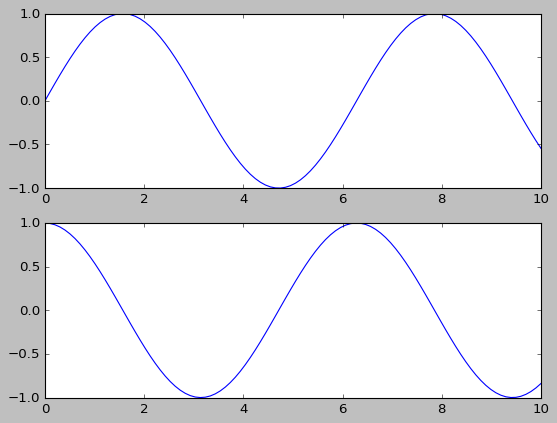

In [6]:
x = np.linspace(0, 10, 100)

###
### MATLAB STYLE
###

plt.figure()  # create a plot figure

# create the first of two panels and set current axis
plt.subplot(2, 1, 1) # (rows, columns, panel number)
plt.plot(x, np.sin(x))

# create the second panel and set current axis
plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x));

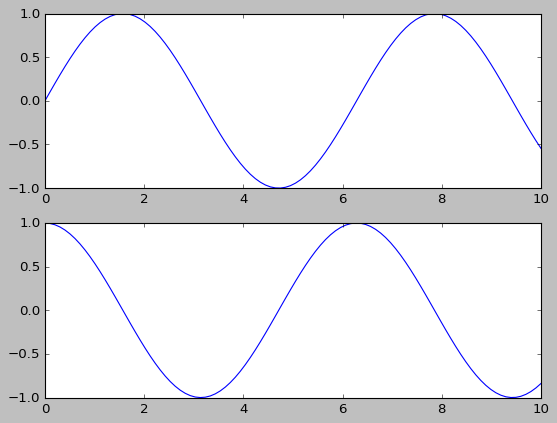

In [7]:
#
# OBJECT ORIENTED STYLE
#

# First create a grid of plots
# ax will be an array of two Axes objects
fig, ax = plt.subplots(2)

# Call plot() method on the appropriate object
ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x));

In [8]:
plt.style.use('seaborn-whitegrid')

> We can start with just a blank slate

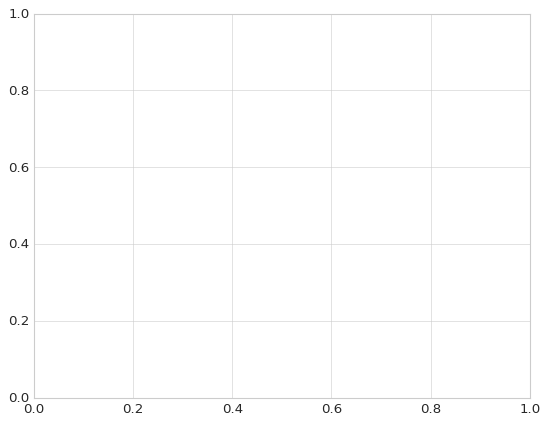

In [9]:

fig = plt.figure()
ax = plt.axes()

> we can use the set of axes we created before to do our plots

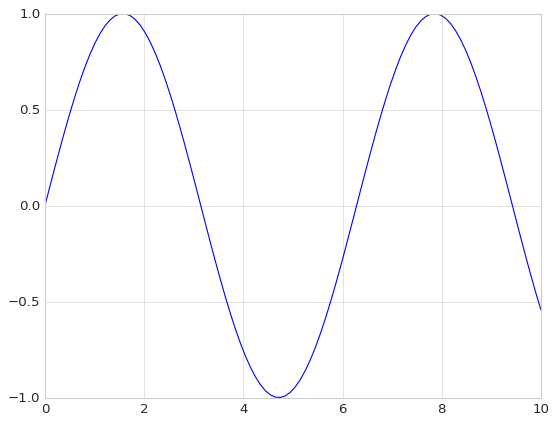

In [10]:
fig = plt.figure()
ax = plt.axes()

ax.plot(x, np.sin(x));

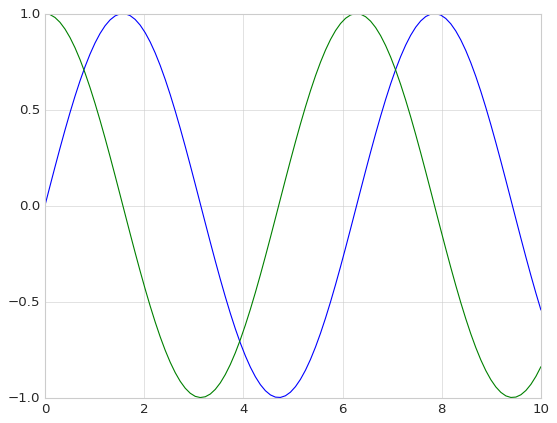

In [11]:
## This is back with the matlab style

plt.plot(x, np.sin(x));
plt.plot(x, np.cos(x));

> we can customize colors

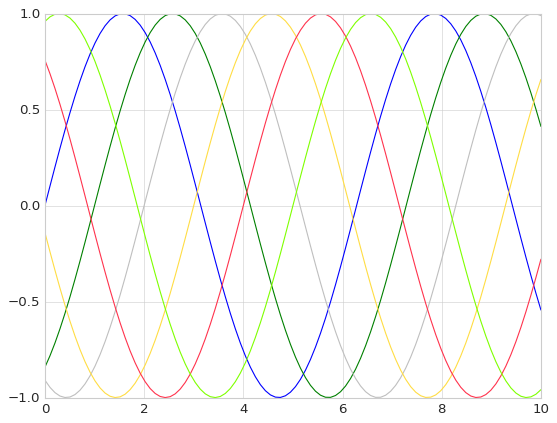

In [12]:
plt.plot(x, np.sin(x - 0), color='blue')        # specify color by name
plt.plot(x, np.sin(x - 1), color='g')           # short color code (rgbcmyk)
plt.plot(x, np.sin(x - 2), color='0.75')        # Grayscale between 0 and 1
plt.plot(x, np.sin(x - 3), color='#FFDD44')     # Hex code (RRGGBB from 00 to FF)
plt.plot(x, np.sin(x - 4), color=(1.0,0.2,0.3)) # RGB tuple, values 0 to 1
plt.plot(x, np.sin(x - 5), color='chartreuse'); # all HTML color names supported

> And line styles

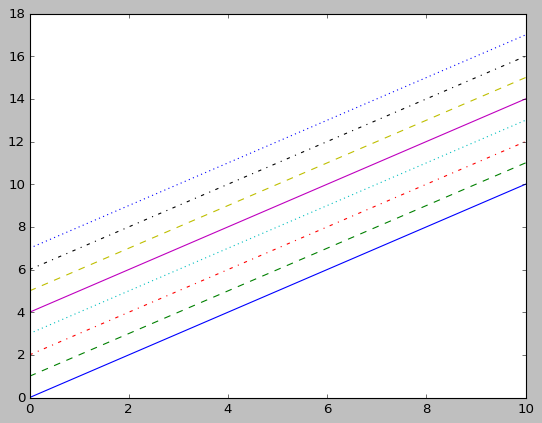

In [86]:
plt.plot(x, x + 0, linestyle='solid')
plt.plot(x, x + 1, linestyle='dashed')
plt.plot(x, x + 2, linestyle='dashdot')
plt.plot(x, x + 3, linestyle='dotted');

# For short, you can use the following codes:
plt.plot(x, x + 4, linestyle='-')  # solid
plt.plot(x, x + 5, linestyle='--') # dashed
plt.plot(x, x + 6, linestyle='-.') # dashdot
plt.plot(x, x + 7, linestyle=':');  # dotted

> or both at the same time

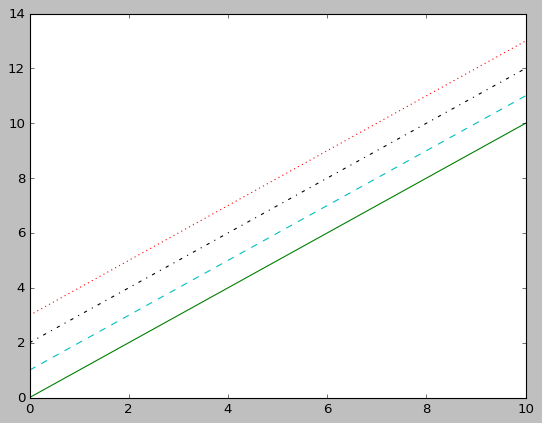

In [85]:
plt.plot(x, x + 0, '-g')  # solid green
plt.plot(x, x + 1, '--c') # dashed cyan
plt.plot(x, x + 2, '-.k') # dashdot black
plt.plot(x, x + 3, ':r');  # dotted red

> lets see how we can set axes limits

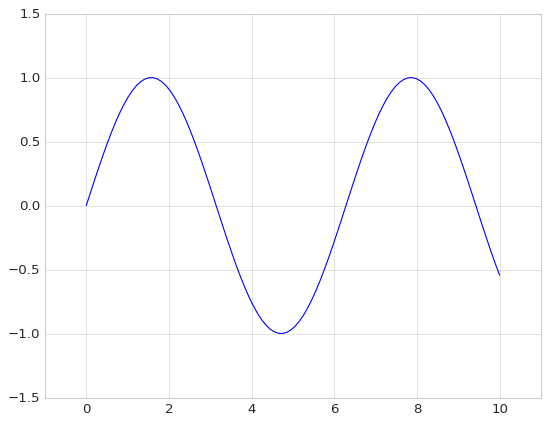

In [15]:
plt.plot(x, np.sin(x))

plt.xlim(-1, 11)
plt.ylim(-1.5, 1.5);

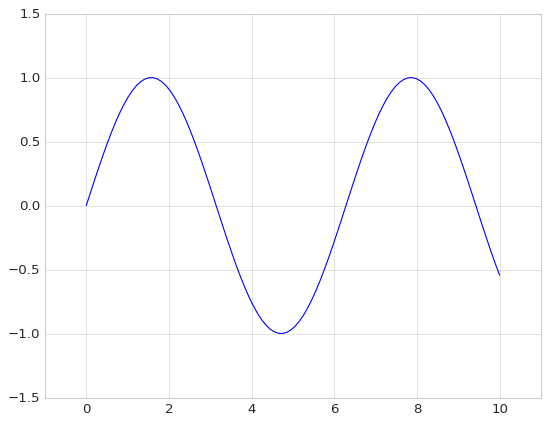

In [16]:
# this does the same as before

# plt.axis will receive an array of [xmin, xmax, ymin, ymax]

plt.plot(x, np.sin(x))
plt.axis([-1, 11, -1.5, 1.5]);

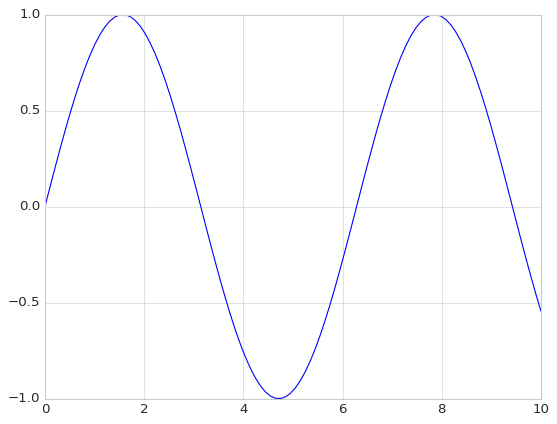

In [17]:
# this will fit the axes' bounds to the function

plt.plot(x, np.sin(x))
plt.axis('tight');

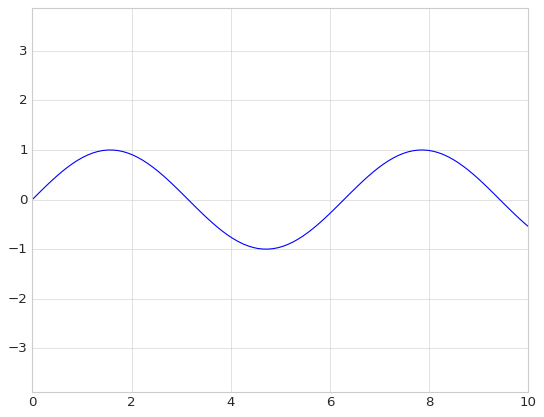

In [18]:
# we can also enforce a 1:1 scale regardind our screen resolution
plt.plot(x, np.sin(x))
plt.axis('equal');

> lets see labeling

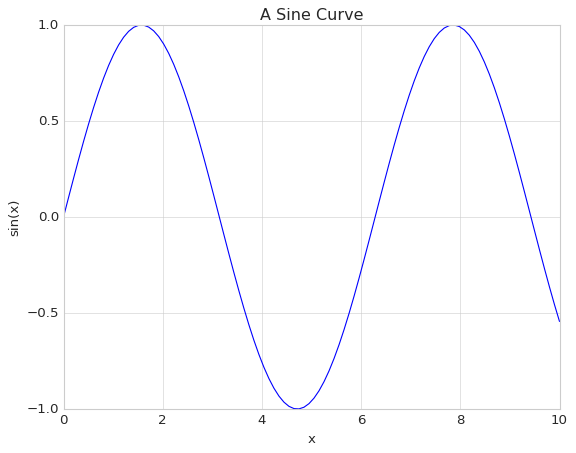

In [19]:
plt.plot(x, np.sin(x))
plt.title("A Sine Curve")
plt.xlabel("x")
plt.ylabel("sin(x)");

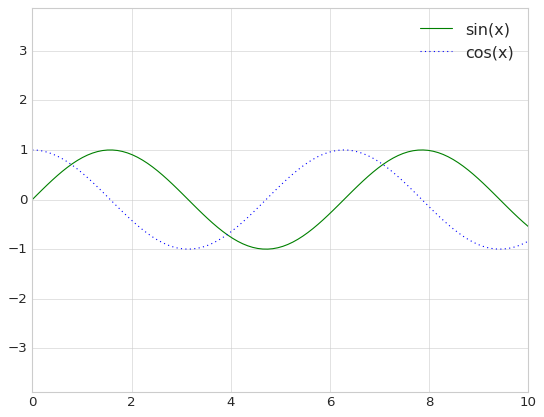

In [20]:
plt.plot(x, np.sin(x), '-g', label='sin(x)')
plt.plot(x, np.cos(x), ':b', label='cos(x)')
plt.axis('equal')

plt.legend();

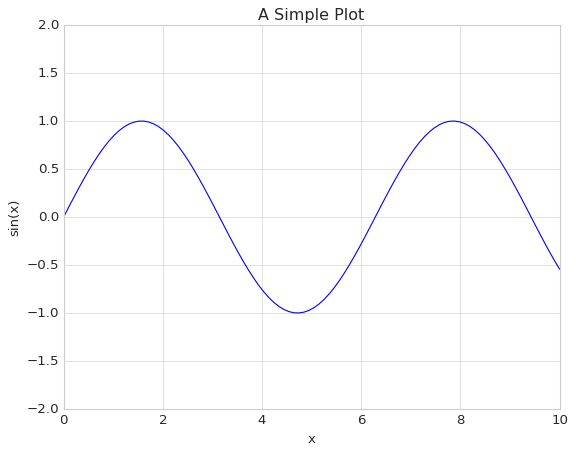

In [21]:
ax = plt.axes()
ax.plot(x, np.sin(x))
ax.set(xlim=(0, 10), ylim=(-2, 2),
       xlabel='x', ylabel='sin(x)',
       title='A Simple Plot');

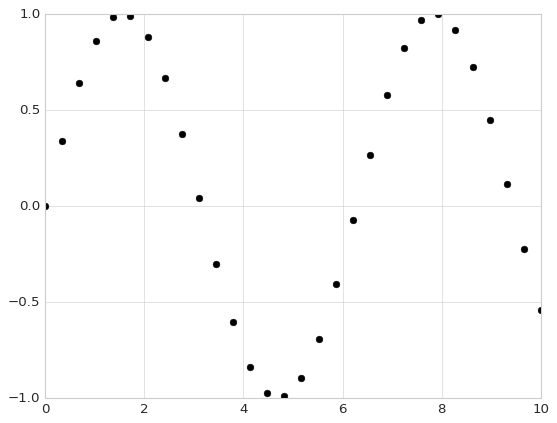

In [22]:
x = np.linspace(0, 10, 30)
y = np.sin(x)

plt.plot(x, y, 'o', color='black');

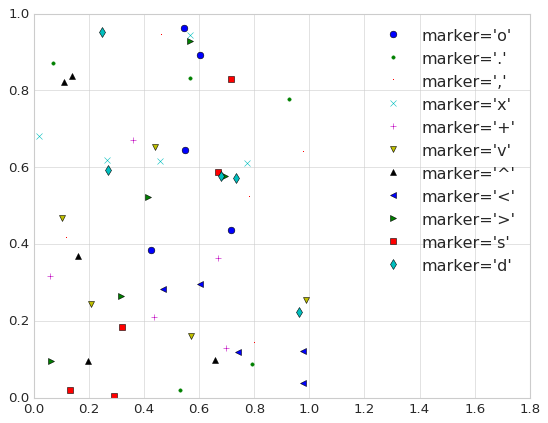

In [23]:
rng = np.random.RandomState(0)
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(rng.rand(5), rng.rand(5), marker,
             label="marker='{0}'".format(marker))
plt.legend(numpoints=1)
plt.xlim(0, 1.8);

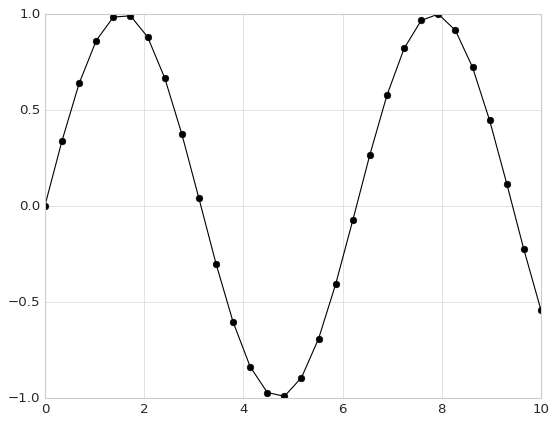

In [24]:
plt.plot(x, y, '-ok');

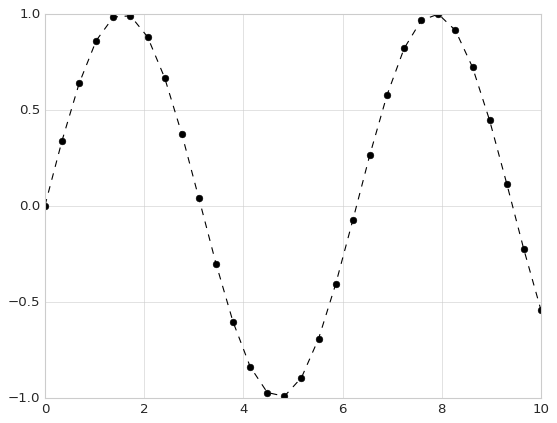

In [25]:
plt.plot(x, y, '--ok');

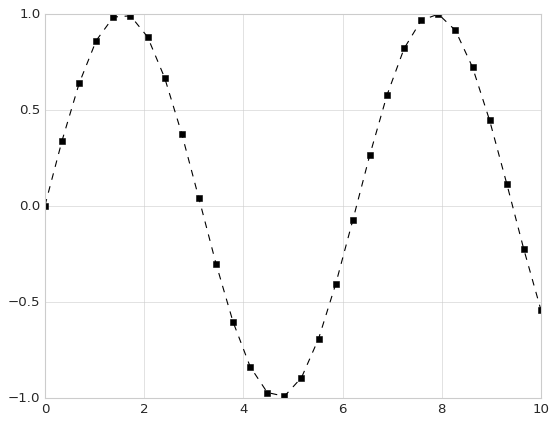

In [26]:
plt.plot(x, y, '--sk');

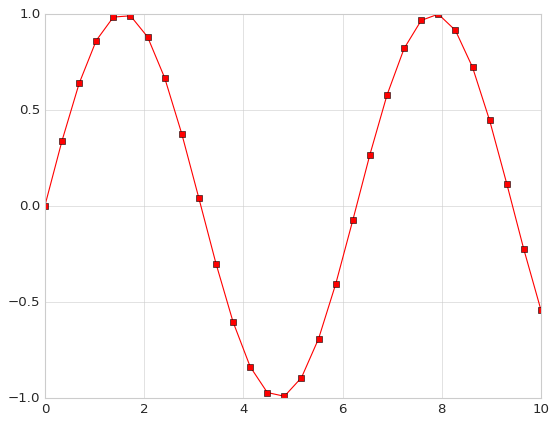

In [27]:
plt.plot(x, y, '-sr');

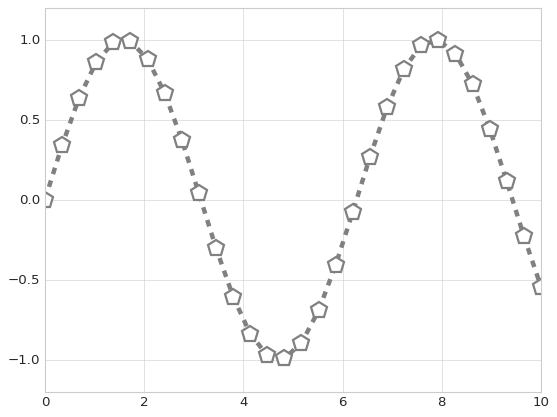

In [28]:
plt.plot(x, y, '--p', color='gray',
         markersize=15, linewidth=4,
         markerfacecolor='white',
         markeredgecolor='gray',
         markeredgewidth=2)
plt.ylim(-1.2, 1.2);

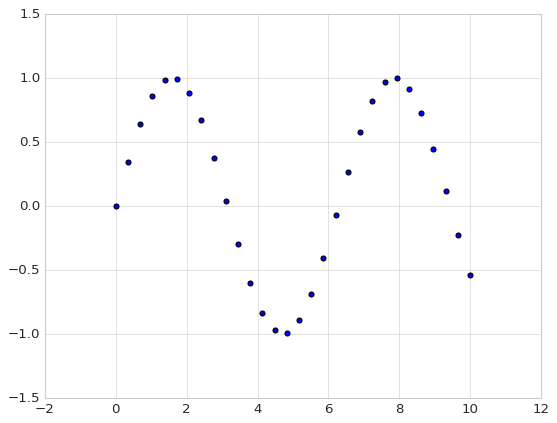

In [29]:
plt.scatter(x, y, marker='o');

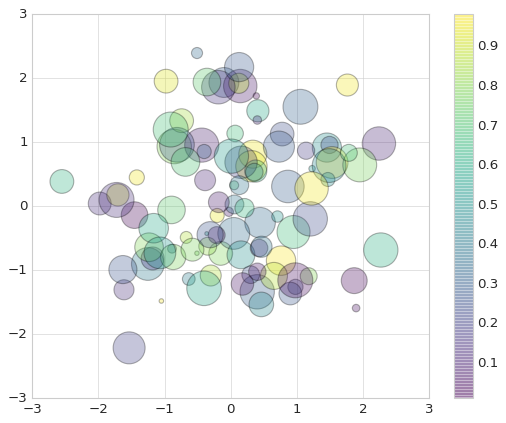

In [30]:
rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3,
            cmap='viridis')
plt.colorbar();  # show color scale

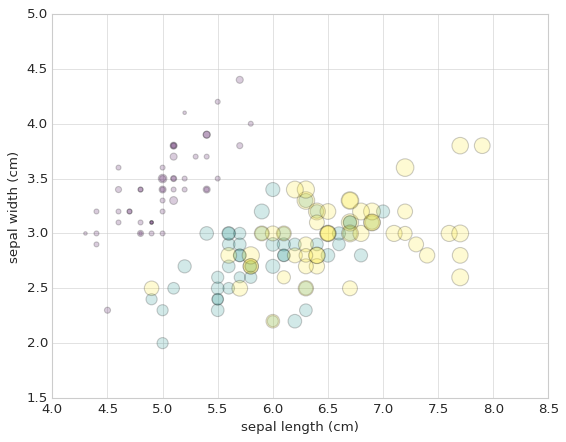

In [31]:
from sklearn.datasets import load_iris
iris = load_iris()
features = iris.data.T

plt.scatter(features[0], features[1], alpha=0.2,
            s=100*features[3], c=iris.target, cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1]);

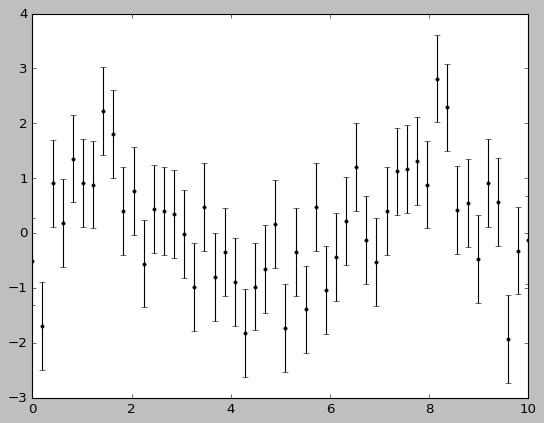

In [88]:
x = np.linspace(0, 10, 50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(50)

plt.errorbar(x, y, yerr=dy, fmt='.k');

In [33]:
print(x.shape)
print(y.shape)
print(dy)

(50,)
(50,)
0.8


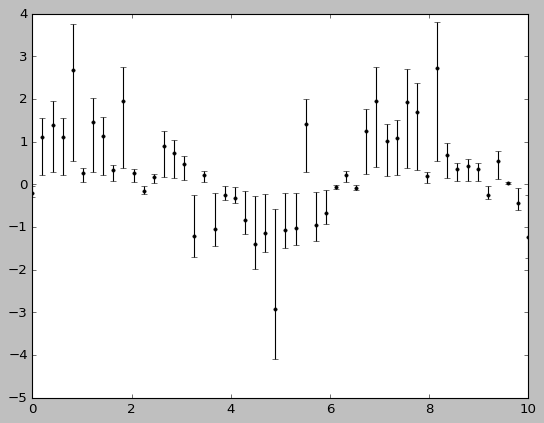

In [96]:
x = np.linspace(0, 10, 50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(50)

plt.errorbar(x, y, yerr=[y*dy, y*dy*0.5], fmt='.k');

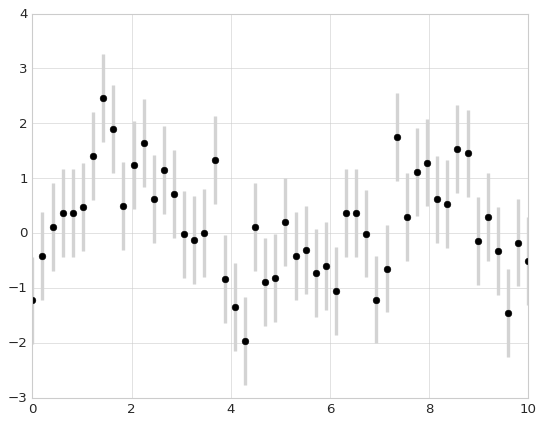

In [35]:
plt.errorbar(x, y, yerr=dy, fmt='o', color='black',
             ecolor='lightgray', elinewidth=3, capsize=0);

In [36]:
from sklearn.gaussian_process import GaussianProcess

# define the model and draw some data
model = lambda x: x * np.sin(x)
xdata = np.array([1, 3, 5, 6, 8])
ydata = model(xdata)

# Compute the Gaussian process fit
gp = GaussianProcess(corr='cubic', theta0=1e-2, thetaL=1e-4, thetaU=1E-1,
                     random_start=100)
gp.fit(xdata[:, np.newaxis], ydata)

xfit = np.linspace(0, 10, 1000)
yfit, MSE = gp.predict(xfit[:, np.newaxis], eval_MSE=True)
dyfit = 2 * np.sqrt(MSE)  # 2*sigma ~ 95% confidence region

/opt/conda/lib/python3.5/site-packages/sklearn/utils/deprecation.py:52: DeprecationWarning: Class GaussianProcess is deprecated; GaussianProcess was deprecated in version 0.18 and will be removed in 0.20. Use the GaussianProcessRegressor instead.
  warnings.warn(msg, category=DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function l1_cross_distances is deprecated; l1_cross_distances was deprecated in version 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)


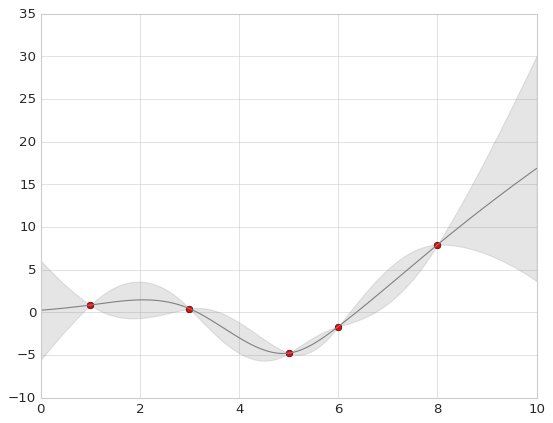

In [37]:
# Visualize the result
plt.plot(xdata, ydata, 'or')
plt.plot(xfit, yfit, '-', color='gray')

plt.fill_between(xfit, yfit - dyfit, yfit + dyfit,
                 color='gray', alpha=0.2)
plt.xlim(0, 10);

In [38]:
data = np.random.randn(1000)

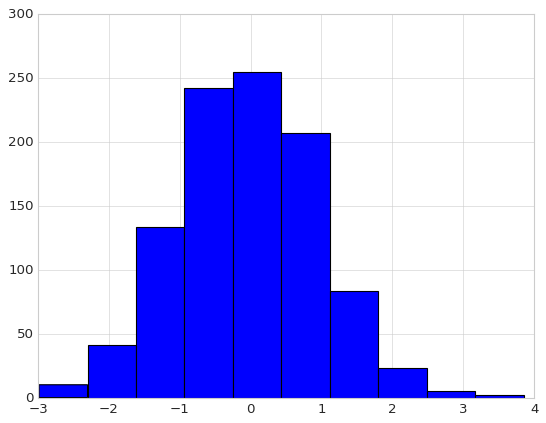

In [39]:
plt.hist(data);

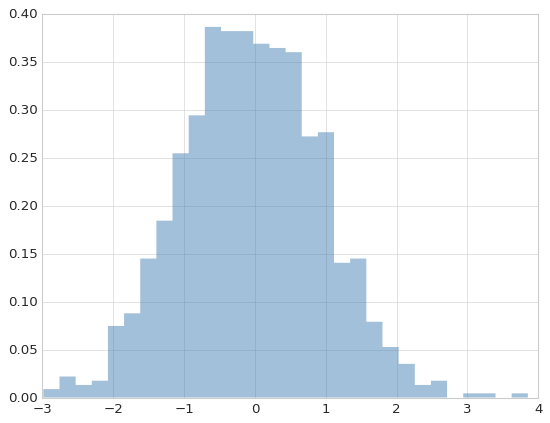

In [40]:
plt.hist(data, bins=30, normed=True, alpha=0.5,
         histtype='stepfilled', color='steelblue',
         edgecolor='none');

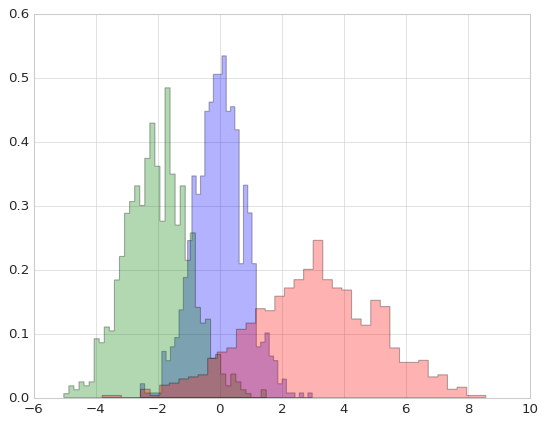

In [41]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict(histtype='stepfilled', alpha=0.3, normed=True, bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

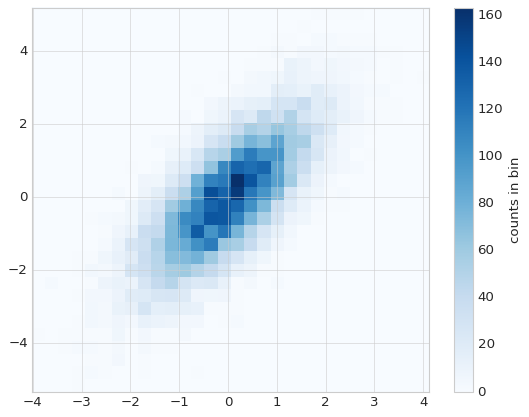

In [42]:
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T

plt.hist2d(x, y, bins=30, cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin')

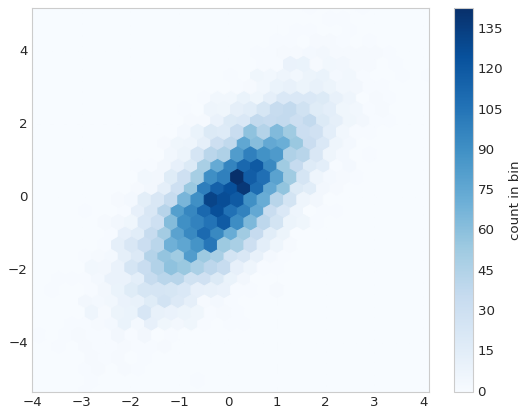

In [43]:
plt.hexbin(x, y, gridsize=30, cmap='Blues')
cb = plt.colorbar(label='count in bin')

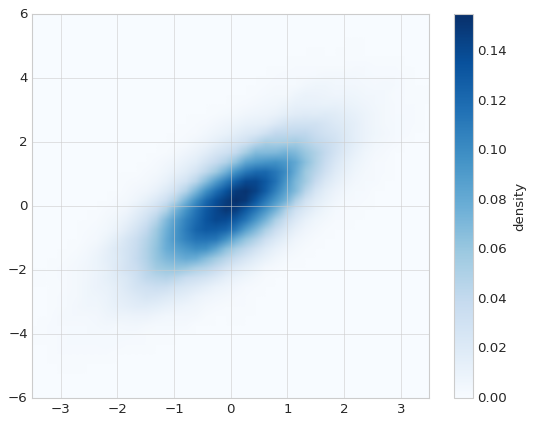

In [44]:
from scipy.stats import gaussian_kde

# fit an array of size [Ndim, Nsamples]
data = np.vstack([x, y])
kde = gaussian_kde(data)

# evaluate on a regular grid
xgrid = np.linspace(-3.5, 3.5, 40)
ygrid = np.linspace(-6, 6, 40)
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))

# Plot the result as an image
plt.imshow(Z.reshape(Xgrid.shape),
           origin='lower', aspect='auto',
           extent=[-3.5, 3.5, -6, 6],
           cmap='Blues')
cb = plt.colorbar()
cb.set_label("density")

> We can also customize legends

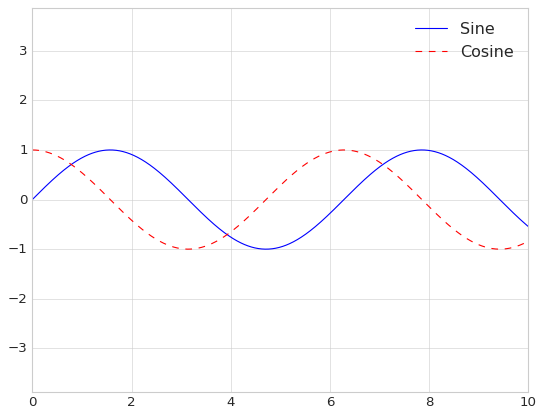

In [45]:
x = np.linspace(0, 10, 1000)
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), '-b', label='Sine')
ax.plot(x, np.cos(x), '--r', label='Cosine')
ax.axis('equal')
leg = ax.legend();

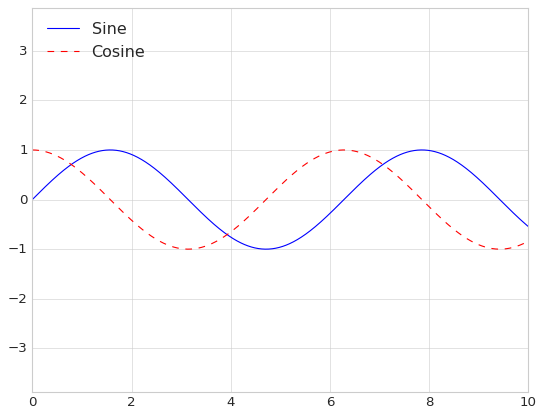

In [46]:
ax.legend(loc='upper left', frameon=False)
fig

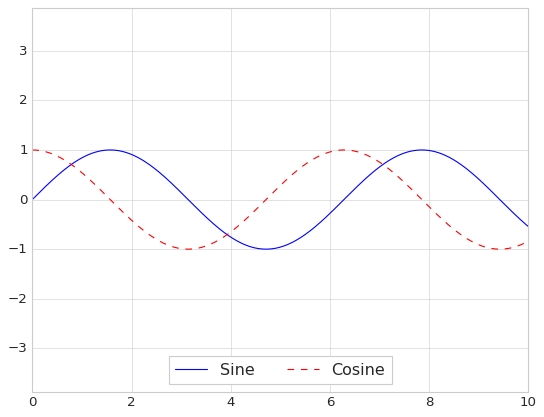

In [47]:
ax.legend(frameon=True, loc='lower center', ncol=2)
fig

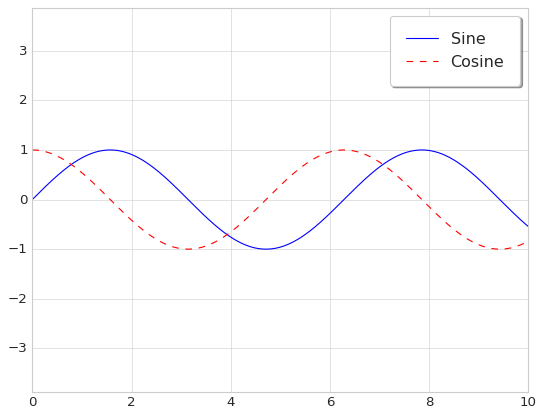

In [48]:
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1, frameon=True)
fig

> We can also choose what shows up in the legend all at once with the plt object. For instance this next plot has 4 lines but we only give names to 2 of them 

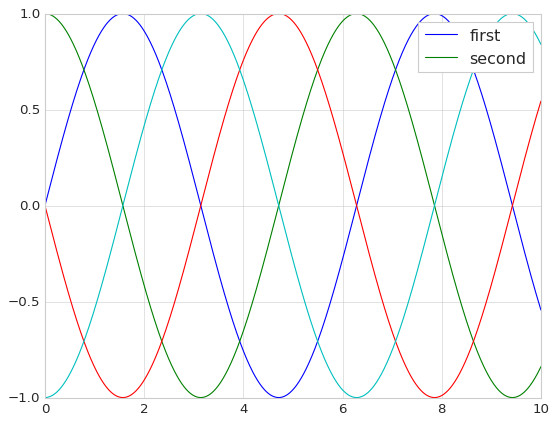

In [49]:
y = np.sin(x[:, np.newaxis] + np.pi * np.arange(0, 2, 0.5))
lines = plt.plot(x, y)

# lines is a list of plt.Line2D instances
plt.legend(lines[:2], ['first', 'second'], frameon=True);

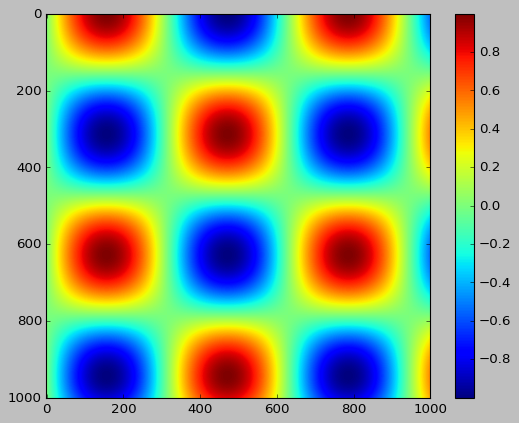

In [50]:
plt.style.use('classic')
x = np.linspace(0, 10, 1000)
I = np.sin(x) * np.cos(x[:, np.newaxis])

plt.imshow(I)
plt.colorbar();

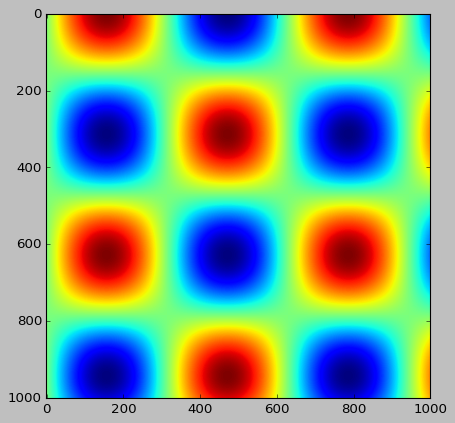

In [51]:
plt.imshow(I, cmap='jet');

In [52]:
from matplotlib.colors import LinearSegmentedColormap

def grayscale_cmap(cmap):
    """Return a grayscale version of the given colormap"""
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    # convert RGBA to perceived grayscale luminance
    # cf. http://alienryderflex.com/hsp.html
    RGB_weight = [0.299, 0.587, 0.114]
    luminance = np.sqrt(np.dot(colors[:, :3] ** 2, RGB_weight))
    colors[:, :3] = luminance[:, np.newaxis]
        
    return LinearSegmentedColormap.from_list(cmap.name + "_gray", colors, cmap.N)
    

def view_colormap(cmap):
    """Plot a colormap with its grayscale equivalent"""
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    cmap = grayscale_cmap(cmap)
    grayscale = cmap(np.arange(cmap.N))
    
    fig, ax = plt.subplots(2, figsize=(6, 2),
                           subplot_kw=dict(xticks=[], yticks=[]))
    ax[0].imshow([colors], extent=[0, 10, 0, 1])
    ax[1].imshow([grayscale], extent=[0, 10, 0, 1])

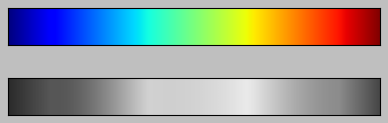

In [53]:
view_colormap('jet')

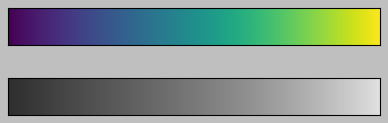

In [54]:
view_colormap('viridis')

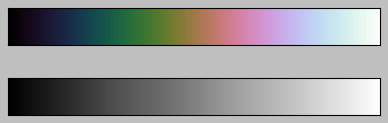

In [55]:
view_colormap('cubehelix')

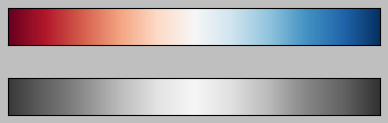

In [56]:
view_colormap('RdBu')

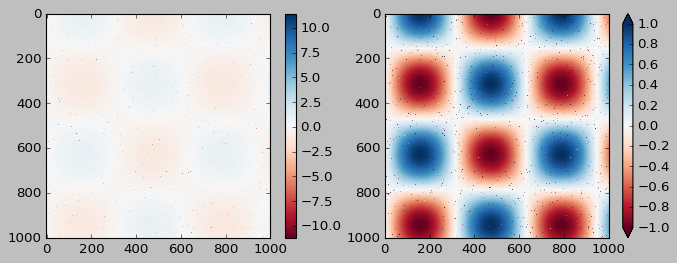

In [57]:
speckles = (np.random.random(I.shape) < 0.01)
I[speckles] = np.random.normal(0, 3, np.count_nonzero(speckles))

plt.figure(figsize=(10, 3.5))

plt.subplot(1, 2, 1)
plt.imshow(I, cmap='RdBu')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(I, cmap='RdBu')
plt.colorbar(extend='both')
plt.clim(-1, 1);

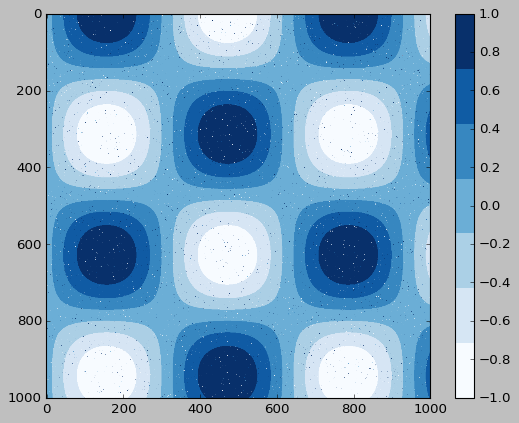

In [58]:
plt.imshow(I, cmap=plt.cm.get_cmap('Blues', 7))
plt.colorbar()
plt.clim(-1, 1);

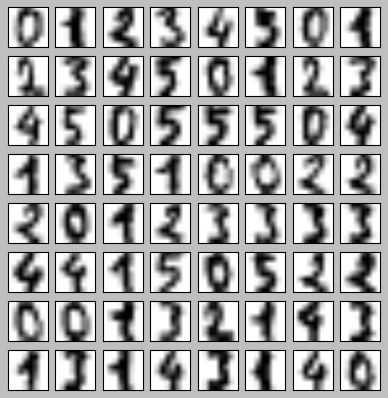

In [59]:
# load images of the digits 0 through 5 and visualize several of them
from sklearn.datasets import load_digits
digits = load_digits(n_class=6)

fig, ax = plt.subplots(8, 8, figsize=(6, 6))
for i, axi in enumerate(ax.flat):
    axi.imshow(digits.images[i], cmap='binary')
    axi.set(xticks=[], yticks=[])

In [60]:
# project the digits into 2 dimensions using IsoMap
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
projection = iso.fit_transform(digits.data)

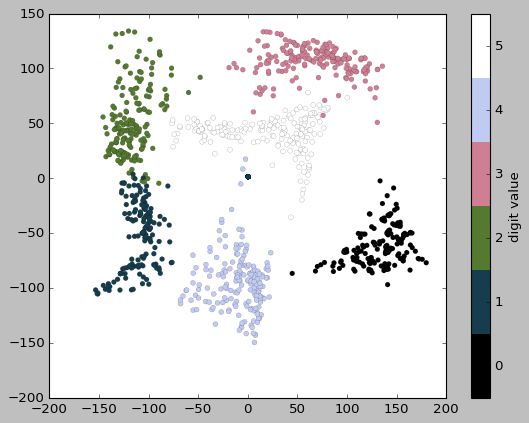

In [61]:
# plot the results
plt.scatter(projection[:, 0], projection[:, 1], lw=0.1,
            c=digits.target, cmap=plt.cm.get_cmap('cubehelix', 6))
plt.colorbar(ticks=range(6), label='digit value')
plt.clim(-0.5, 5.5)

In [62]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import numpy as np

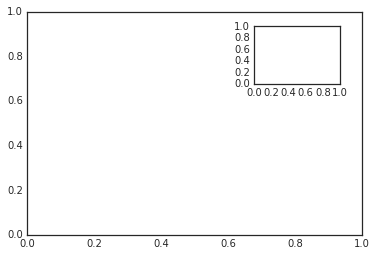

In [63]:
ax1 = plt.axes()  # standard axes
ax2 = plt.axes([0.65, 0.65, 0.2, 0.2])

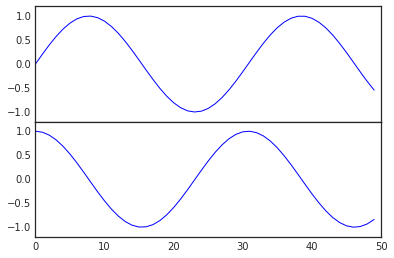

In [64]:
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4],
                   xticklabels=[], ylim=(-1.2, 1.2))
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4],
                   ylim=(-1.2, 1.2))

x = np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x));

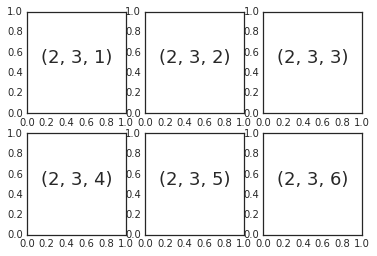

In [65]:
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.text(0.5, 0.5, str((2, 3, i)),
             fontsize=18, ha='center')

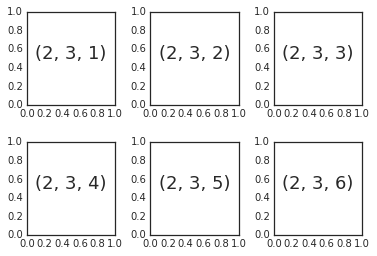

In [66]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    ax.text(0.5, 0.5, str((2, 3, i)),
           fontsize=18, ha='center')

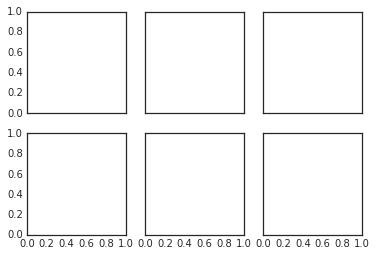

In [67]:
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')

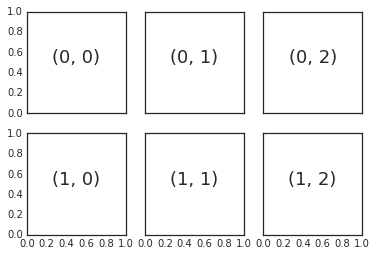

In [68]:
# axes are in a two-dimensional array, indexed by [row, col]
for i in range(2):
    for j in range(3):
        ax[i, j].text(0.5, 0.5, str((i, j)),
                      fontsize=18, ha='center')
fig

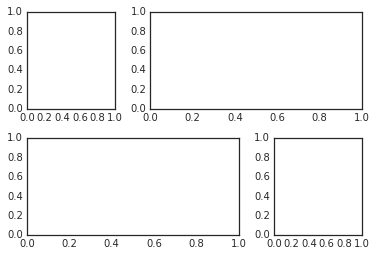

In [69]:
grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3)
plt.subplot(grid[0, 0])
plt.subplot(grid[0, 1:])
plt.subplot(grid[1, :2])
plt.subplot(grid[1, 2]);

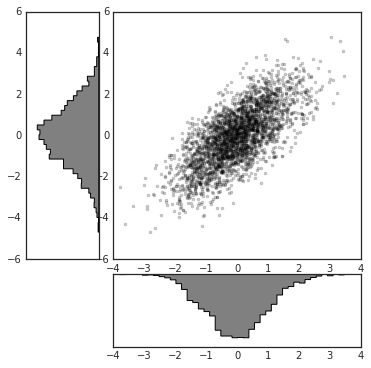

In [70]:
# Create some normally distributed data
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T

# Set up the axes with gridspec
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

# scatter points on the main axes
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)

# histogram on the attached axes
x_hist.hist(x, 40, histtype='stepfilled',
            orientation='vertical', color='gray')
x_hist.invert_yaxis()

y_hist.hist(y, 40, histtype='stepfilled',
            orientation='horizontal', color='gray')
y_hist.invert_xaxis()

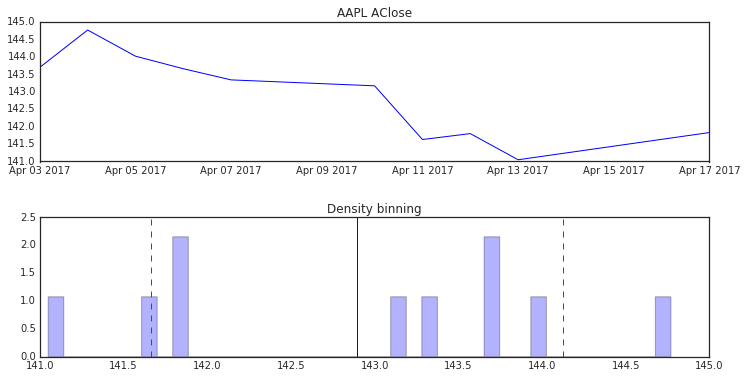

In [71]:
aapl = _stock["AAPL"].iloc[-10:,:]

fig, ax = plt.subplots(2,1,figsize=(12, 6))

ax[0].set_title("AAPL AClose")
ax[1].set_title("Density binning")

fig.subplots_adjust(hspace=0.4, wspace=0.4)

ax[0].plot(aapl["Date"], aapl["Adj Close"], '-')

ax[1].hist(aapl["Adj Close"], histtype='stepfilled', alpha=0.3, normed=True, bins=40)
ax[1].axvline(aapl["Adj Close"].mean())
ax[1].axvline(aapl["Adj Close"].mean() + aapl["Adj Close"].std(), linestyle="--", color="r")
ax[1].axvline(aapl["Adj Close"].mean() - aapl["Adj Close"].std(), linestyle="--", color="r")

plt.show()

In [72]:
aapl.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,10.0,1.430730e+02,1.055188e+00,1.414800e+02,1.421675e+02,1.434250e+02,1.437250e+02,1.442900e+02
High,10.0,1.436810e+02,1.211129e+00,1.418800e+02,1.426225e+02,1.440000e+02,1.444350e+02,1.454600e+02
Low,10.0,1.422640e+02,1.353968e+00,1.400600e+02,1.410200e+02,1.429750e+02,1.432450e+02,1.438100e+02
Close,10.0,1.428970e+02,1.230429e+00,1.410500e+02,1.418075e+02,1.432550e+02,1.436900e+02,1.447700e+02
Volume,10.0,2.080363e+07,4.576541e+06,1.642400e+07,1.785792e+07,1.987570e+07,2.089822e+07,3.027530e+07
Adj Close,10.0,1.428970e+02,1.230429e+00,1.410500e+02,1.418075e+02,1.432550e+02,1.436900e+02,1.447700e+02


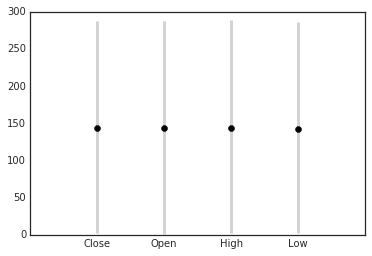

In [73]:
aapl = aapl.loc[ : , ["Close", "Open", "High", "Low"]]

x = np.arange(0, aapl.describe().T.shape[0])
y = aapl.describe().T["mean"]
dy = [aapl.describe().T["min"], aapl.describe().T["max"]]

plt.xticks(x, aapl.describe().T.index.tolist())
plt.xlim(-1, x.shape[0])
plt.errorbar(x, y, yerr=dy, fmt='o', color='black',
             ecolor='lightgray', elinewidth=3, capsize=0);
plt.show()


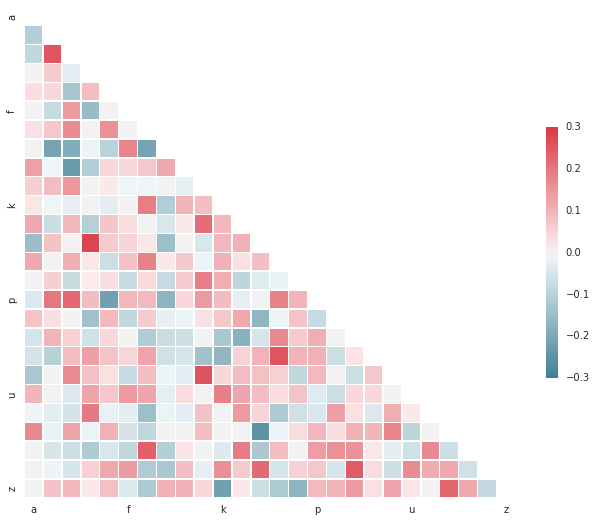

In [74]:
from string import ascii_lowercase

letters = [ascii_lowercase[_] for _ in range(26)]

sns.set(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)
d = pd.DataFrame(data=rs.normal(size=(100, 26)),
                 columns=list(letters[:26]))

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, xticklabels=5, yticklabels=5,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)


In [75]:
corr = aapl.corr()
print(corr)

print("\n correlation: [{},{}]".format(corr.values.min(), corr.values.max()))

          Close      Open      High       Low
Close  1.000000  0.781067  0.891286  0.899461
Open   0.781067  1.000000  0.927615  0.827998
High   0.891286  0.927615  1.000000  0.850614
Low    0.899461  0.827998  0.850614  1.000000

 correlation: [0.7810672872300625,1.0]


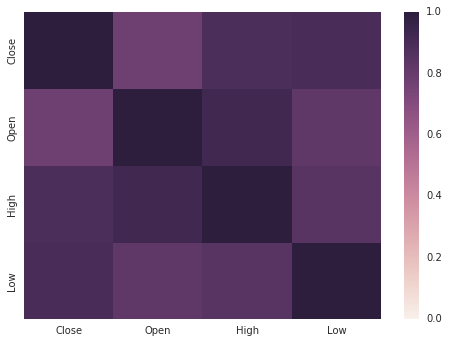

In [80]:
_r = [0, 1]
_c = corr[(corr <= _r[1]) & (corr >= _r[0])]

sns.heatmap(_c, vmin=0, vmax=1)

In [ ]:
from_n = -150
to_n = from_n + 99

x = _stock["AAPL"].iloc[ from_n:to_n , : ]["Date"]
y = _stock["AAPL"].iloc[ from_n:to_n , : ]["Close"]
dy = np.array([_stock["AAPL"].iloc[ from_n:to_n , : ]["Low"], _stock["AAPL"].iloc[ from_n:to_n , : ]["High"]])


plt.plot(x, _stock["AAPL"].iloc[ from_n:to_n , : ]["Close"]);
plt.plot(x, _stock["AAPL"].iloc[ from_n:to_n , : ]["High"], color='red');
plt.plot(x, _stock["AAPL"].iloc[ from_n:to_n , : ]["Low"], color='green');


In [ ]:
a = [1,2,3,4,5,6,7,8,9]
a

In [ ]:
s = None
e = None

a[s:e]

In [ ]:
aapl = _stock["AAPL"][-100:]
goog = _stock["GOOG"][-100:]

In [ ]:
exc_list = ["SPY", "RWM", "TWM", "SH", "^IXIC", "^RUT", "NDX"]

initial_dataload(exc_list)

In [ ]:
_exc = dict()

for tkr in exc_list:
    _exc[tkr] = pd.read_csv("{}/{}.csv".format(DATA_PATH, tkr))
    _exc[tkr]["Date"] = pd.to_datetime(_exc[tkr]["Date"], infer_datetime_format=True)

In [ ]:
_exc_df = pd.DataFrame()


_exc_df["Date"] = pd.to_datetime(_exc["SPY"]["Date"], infer_datetime_format=True)
_exc_df["SPY"] = _exc["SPY"]["Close"]
_exc_df["IXIC"] = _exc["^IXIC"]["Close"]
_exc_df["RUT"] = _exc["^RUT"]["Close"]
_exc_df["NDX"] =_exc["NDX"]["Close"]
_exc_df["RWM"] =_exc["RWM"]["Close"]
_exc_df["TWM"] =_exc["TWM"]["Close"]
_exc_df["SH"] =_exc["SH"]["Close"]


_exc_df.head()

In [ ]:
_exc_df.info()

In [ ]:
_exc_df = _exc_df.iloc[:, :]

In [ ]:
_exc_df.corr()

In [ ]:
sns.heatmap(_exc_df.corr(), vmin=-1, vmax=1, cmap="RdYlGn", annot=True)

In [ ]:
from sklearn.cross_validation import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score


In [ ]:
X = _exc_df.loc[ : , ["IXIC", "RUT", "NDX", "RWM", "TWM", "SH"]].values
y = _exc_df["SPY"].values

X = np.nan_to_num(X)
y = np.nan_to_num(y)


In [ ]:
X.shape

In [ ]:

train_pred = None
test_pred = None

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


clf = linear_model.LinearRegression()
clf.fit(X_train, y_train)

train_pred = clf.predict(X_train)
test_pred = clf.predict(X_test)

train_score = r2_score(y_train, train_pred)
test_score = r2_score(y_test, test_pred)

print("Train Score: {}".format(train_score))
print("Test Score: {}".format(test_score))


In [ ]:
plt.plot(y_test[-100:])
plt.plot(test_pred[-100:])

plt.show()

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(6, input_dim=6, init="normal" , activation="relu" ))
    model.add(Dense(1, init='normal'))
    # Compile model
    model.compile(loss="mean_squared_error", optimizer="adam")
    return model


estimator = KerasRegressor(build_fn=baseline_model, nb_epoch=100, batch_size=5, verbose=0)
kfold = KFold(X.shape[0], n_folds=10)
#results = cross_val_score(estimator, X, y, cv=kfold)

print("Baseline: %.2f (%.2f) MSE" % (results.mean(), results.std()))

In [ ]:
def larger_model():
    # create model
    model = Sequential()
    model.add(Dense(6, input_dim=6, init="normal" , activation="relu" ))
    model.add(Dense(6, init="normal" , activation="relu" ))
    model.add(Dense(1, init="normal" ))
    # Compile model
    model.compile(loss="mean_squared_error" , optimizer="adam" )
    return model

estimators = []
estimators.append(("standardize" , StandardScaler()))
estimators.append(("mlp" , KerasRegressor(build_fn=larger_model, nb_epoch=50, batch_size=5, verbose=0)))

pipeline = Pipeline(estimators)
kfold = KFold(X.shape[0], n_folds=10)
#results = cross_val_score(pipeline, X, y, cv=kfold)
print("Larger: %.2f (%.2f) MSE" % (results.mean(), results.std()))

In [ ]:
def wider_model():
    # create model
    model = Sequential()
    model.add(Dense(30, input_dim=6, init="normal" , activation="relu" ))
    model.add(Dense(1, init="normal" ))
    # Compile model
    model.compile(loss="mean_squared_error" , optimizer="adam" )
    return model

# evaluate model with standardized dataset
estimators = []
estimators.append(("standardize" , StandardScaler()))
estimators.append(("mlp" , KerasRegressor(build_fn=wider_model, nb_epoch=100, batch_size=5, verbose=0)))

pipeline = Pipeline(estimators)
kfold = KFold(X.shape[0], n_folds=10)
#results = cross_val_score(pipeline, X, y, cv=kfold)

print("Wider: %.2f (%.2f) MSE" % (results.mean(), results.std()))

In [ ]:
import sympy as sy

In [ ]:
x = sy.Symbol("x")
y = sy.Symbol("y")

In [ ]:
3 + sy.sqrt(x) + 2**4 * -1

In [ ]:
f = x**2 + 3 + 0.5 * x ** 2 + 3 / 2

In [ ]:
sy.simplify(f)

In [ ]:
sy.init_printing(pretty_print=False, use_unicode=False)

In [ ]:
print(sy.pretty(f))

In [ ]:
print(sy.pretty(sy.sqrt(x) + 1))

In [ ]:
sns.kdeplot(_exc_df.isnull()["SH"])

In [ ]:
sns.kdeplot(_exc_df.isnull()["SPY"])

plt.show()

In [ ]:
_a = ["IXIC", "RUT", "NDX", "RWM", "TWM", "SH"]

In [ ]:
sns.distplot(_exc_df.isnull()["SH"])